# Preprocessing

## Import Packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.graphics import tsaplots

## Loading Data

In [2]:
dji = pd.read_csv('DJIA.csv', index_col='DATE', parse_dates=["DATE"])

# Exploring the Data

In [3]:
dji.head()

,DJIA
DATE,
2011-11-04,11983.24
2011-11-11,12153.68
2011-11-18,11796.16
2011-11-25,11231.78
2011-12-02,12019.42


In [4]:
dji.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 521 entries, 2011-11-04 to 2021-10-22
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DJIA    521 non-null    float64
dtypes: float64(1)
memory usage: 8.1 KB


## Preprocessing

In [5]:
dji.isna().sum()

DJIA    0
dtype: int64

In [6]:
dji

,DJIA
DATE,
2011-11-04,11983.24
2011-11-11,12153.68
2011-11-18,11796.16
2011-11-25,11231.78
2011-12-02,12019.42
...,...
2021-09-24,34798.00
2021-10-01,34326.46
2021-10-08,34746.25


In [7]:
dji = dji.rename(columns={'DJIA':'Close'})

In [8]:
type(dji)

pandas.core.frame.DataFrame

In [9]:
dji.describe()

,Close
count,521.000000
mean,21021.732610
std,6171.424062
min,11231.780000
25%,16380.410000
50%,18570.850000
75%,25790.350000
max,35677.020000


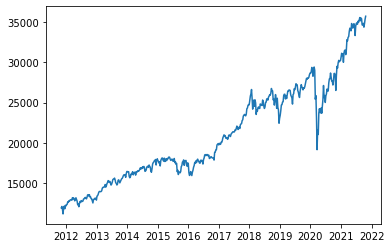

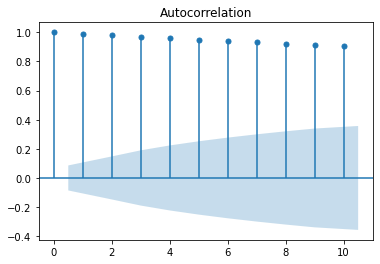

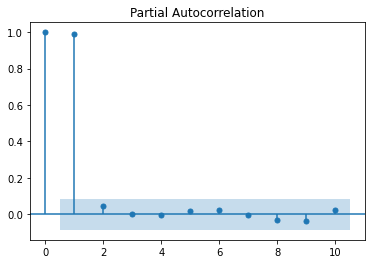

In [10]:
plt.plot(dji)
tsaplots.plot_acf(dji['Close'], lags=10)
tsaplots.plot_pacf(dji['Close'], lags=10)
# Show plot
plt.show()

### Testing for stationarity with KPSS and ADFuller

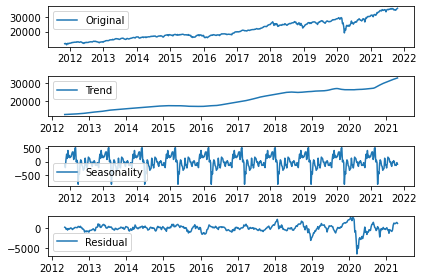

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(dji)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the original data, the trend, the seasonality, and the residuals 
plt.subplot(411)
plt.plot(dji, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = "Seasonality")
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = "Residual")
plt.legend(loc = 'best')
plt.tight_layout()

In [12]:
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
kpss(dji)

C:\Users\yorik\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\yorik\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(2.543155947773848,
 0.01,
 19,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [13]:
adfuller(dji)

(0.15964984872305377,
 0.9699054753313646,
 1,
 519,
 {'1%': -3.4430126933746767,
  '5%': -2.8671249839002764,
  '10%': -2.569744590233924},
 7691.094429561016)

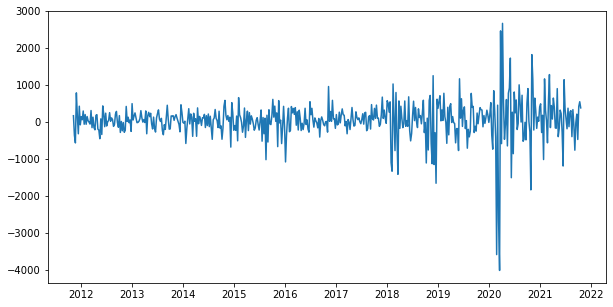

In [14]:
_ = plt.figure(figsize=(10,5))
_ = plt.plot(dji.diff().dropna())

In [15]:
kpss(dji.diff().dropna())

C:\Users\yorik\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\yorik\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.15932798465637021,
 0.1,
 19,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [16]:
adfuller(dji.diff().dropna())

(-24.99211641753969,
 0.0,
 0,
 519,
 {'1%': -3.4430126933746767,
  '5%': -2.8671249839002764,
  '10%': -2.569744590233924},
 7674.683880398728)

In [17]:
dji_log = np.log(dji)

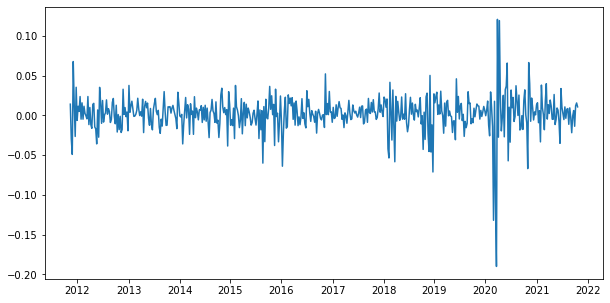

In [18]:
_ = plt.figure(figsize=(10,5))
_ = plt.plot(dji_log.diff())

In [19]:
kpss(dji_log.diff().dropna())

C:\Users\yorik\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\yorik\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.04675309245732298,
 0.1,
 19,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [20]:
adfuller(dji_log.diff().dropna())

(-25.460466450146868,
 0.0,
 0,
 519,
 {'1%': -3.4430126933746767,
  '5%': -2.8671249839002764,
  '10%': -2.569744590233924},
 -2365.5363989017374)

Our p-value is now greater than 0.05, so we can accept the null hypothesis that our data is stationary.

### Splitting into training data and testing data

In [21]:
split=int(len(dji) * 0.85) 
train, test = dji[0:split], dji[split:len(dji)]    

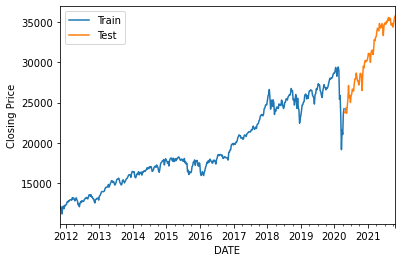

In [22]:
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
train.plot(ax=ax)
test.plot(ax=ax)
ax.legend(["Train", "Test"])
ax.set_ylabel('Closing Price')
plt.show()

### Scaling the Data

In [23]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train.values.reshape(-1,1))
scaled_data.shape

(442, 1)

In [24]:
prediction_days = 30

X_train = []
y_train = []

for i in range(prediction_days, len(scaled_data)-5):      
    X_train.append(scaled_data[i-prediction_days: i, 0])
    y_train.append(scaled_data[i+5, 0])                     

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [25]:
print(X_train.shape)
print(y_train.shape)

(407, 30, 1)
(407,)


I am going to do ARIMA modeling and LSTM model for forecasting